<a href="https://colab.research.google.com/github/arunkusuma74/KDD_project/blob/main/deliverable_2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

,Description,Value
0,Session id,42
1,Target,is_hazardous
2,Target type,Binary
3,Original data shape,"(338199, 6)"
4,Transformed data shape,"(338199, 6)"
5,Transformed train set shape,"(236739, 6)"
6,Transformed test set shape,"(101460, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9134,0.9445,0.5316,0.7172,0.6105,0.5631,0.5711,15.2290
rf,Random Forest Classifier,0.9123,0.9434,0.5303,0.7096,0.6070,0.5588,0.5663,42.5580
xgboost,Extreme Gradient Boosting,0.8924,0.9137,0.2672,0.7076,0.3878,0.3417,0.3910,1.8570
lightgbm,Light Gradient Boosting Machine,0.8877,0.9042,0.2010,0.7128,0.3134,0.2726,0.3387,6.3560
gbc,Gradient Boosting Classifier,0.8853,0.8952,0.1583,0.7361,0.2604,0.2255,0.3062,40.3500
ada,Ada Boost Classifier,0.8835,0.8859,0.1581,0.6921,0.2571,0.2201,0.2929,8.9560
dt,Decision Tree Classifier,0.8824,0.7386,0.5456,0.5390,0.5422,0.4748,0.4748,1.3690
knn,K Neighbors Classifier,0.8779,0.8478,0.3809,0.5301,0.4433,0.3768,0.3833,2.1130
svm,SVM - Linear Kernel,0.8724,0.8115,0.0000,0.0000,0.0000,0.0000,0.0000,0.3460
qda,Quadratic Discriminant Analysis,0.8724,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2910


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Best PyCaret Model: ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


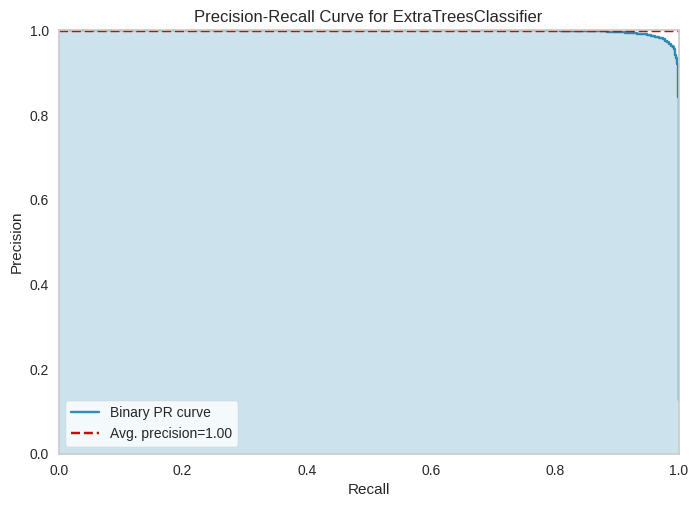

Best Scikit-learn Model: Random Forest
PR-AUC Score: 0.73

Model: Logistic Regression
PR-AUC Score: 0.35
Classification Report:
              precision    recall  f1-score       support
False          0.879560  0.988307  0.930768  59011.000000
True           0.482371  0.074516  0.129091   8629.000000
accuracy       0.871733  0.871733  0.871733      0.871733
macro avg      0.680965  0.531412  0.529929  67640.000000
weighted avg   0.828890  0.871733  0.828496  67640.000000
Confusion Matrix:
[[58321   690]
 [ 7986   643]]

Model: Decision Tree
PR-AUC Score: 0.60
Classification Report:
              precision    recall  f1-score       support
False          0.938451  0.935080  0.936763  59011.000000
True           0.566678  0.580600  0.573555   8629.000000
accuracy       0.889858  0.889858  0.889858      0.889858
macro avg      0.752565  0.757840  0.755159  67640.000000
weighted avg   0.891023  0.889858  0.890427  67640.000000
Confusion Matrix:
[[55180  3831]
 [ 3619  5010]]

Model: Random

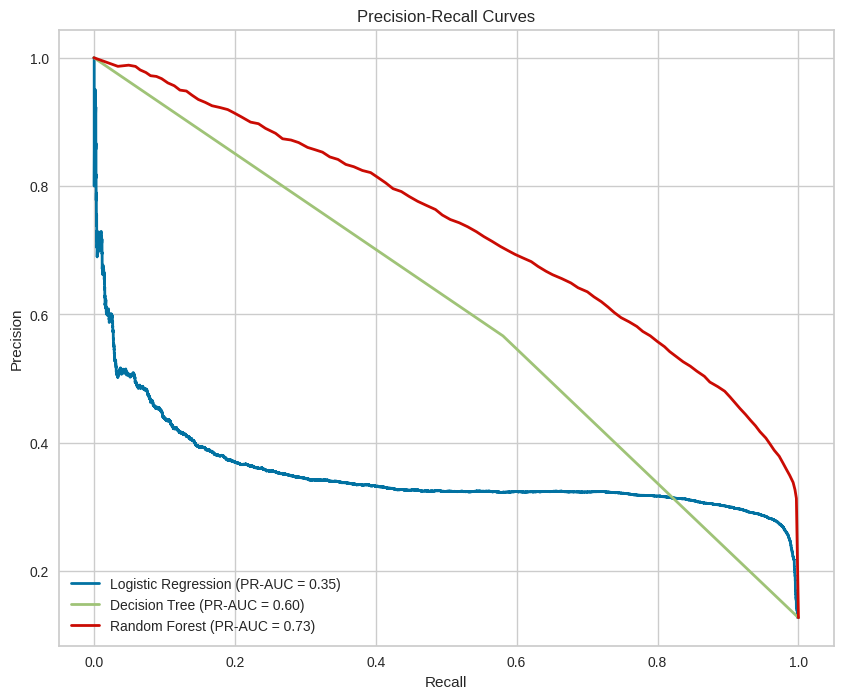

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from pycaret.classification import *

# Load the dataset
df = pd.read_csv('/content/nearest-earth-objects(1910-2024).csv')

# Handle missing values separately for numeric and categorical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Impute missing values for numeric columns with median
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Impute missing values for categorical columns with the most frequent value
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Convert categorical features to numeric
df['orbiting_body'] = df['orbiting_body'].astype('category').cat.codes

# Feature Engineering: Calculate average diameter
df['estimated_diameter_avg'] = (df['estimated_diameter_min'] + df['estimated_diameter_max']) / 2

# Select features and target variable
features = ['absolute_magnitude', 'estimated_diameter_avg', 'relative_velocity', 'miss_distance', 'orbiting_body']
X = df[features]
y = df['is_hazardous']

# Combine features and target into a single DataFrame for PyCaret
data = X.copy()
data['is_hazardous'] = y

# Initialize the PyCaret environment
clf = setup(data, target='is_hazardous', session_id=42,
            normalize=True,  # Normalize features
            remove_multicollinearity=True,  # Remove multicollinearity
            ignore_features=None)  # Do not ignore any features

# Compare models using PyCaret
best_model_pycaret = compare_models()

# Print the best model in PyCaret
print(f"Best PyCaret Model: {best_model_pycaret}")

# Evaluate the best PyCaret model
evaluate_model(best_model_pycaret)

# Finalize and save the PyCaret model
final_model_pycaret = finalize_model(best_model_pycaret)
save_model(final_model_pycaret, 'best_neo_model_pycaret')

# Plot Precision-Recall curve for the best PyCaret model
plot_model(final_model_pycaret, plot='pr')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Function to evaluate models
def evaluate_model_sklearn(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    report = classification_report(y_test, y_pred, output_dict=True)

    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)

    confusion = confusion_matrix(y_test, y_pred)

    return report, pr_auc, confusion

# Evaluate all scikit-learn models
results = {}
for model_name, model in models.items():
    report, pr_auc, confusion = evaluate_model_sklearn(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[model_name] = {'report': report, 'pr_auc': pr_auc, 'confusion': confusion}

# Print the results for scikit-learn models
best_model_name = max(results, key=lambda x: results[x]['pr_auc'])
print(f"Best Scikit-learn Model: {best_model_name}")
print(f"PR-AUC Score: {results[best_model_name]['pr_auc']:.2f}")

# Display all model results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"PR-AUC Score: {metrics['pr_auc']:.2f}")
    print("Classification Report:")
    print(pd.DataFrame(metrics['report']).transpose())
    print("Confusion Matrix:")
    print(metrics['confusion'])

# Plot Precision-Recall curves for all scikit-learn models
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)

    plt.plot(recall, precision, lw=2, label=f'{model_name} (PR-AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.show()


In [ ]:
# Data Preperation:

# 1. Handling missing values: The dataset contained both numeric and categorical columns with missing values.
# Missing values in numeric columns were imputed with the median of each column, Missing values in categorical
# columns were imputed with the most frequent value (mode) of each column.

# 2. Feature Engineering: A new feature, estimated_diameter_avg, was created by averaging the estimated_diameter_min
# and estimated_diameter_max columns. This feature represents a single value for the asteroid's diameter, simplifying
# the model's input space.

# 3. Categorical Encoding: The categorical column orbiting_body was converted into numeric codes. This transformation
# allows the model to process this categorical information numerically.

# Modeling:

# 1. PyCaret: To ensure an accurate modeling process, the dataset was configured in PyCaret with capabilities to
# reduce multicollinearity and standardize features. Using standard metrics, PyCaret evaluated numerous classification
# models and selected the best performing one and precision-recall curves evaluated the best model discovered by
# PyCaret.

# 2. Scikit-Learn Models: Three conventional machine learning models, including Random Forest, Decision Tree, and
# Logistic Regression, were built using Scikit-learn.
# Normalization of features was performed using StandardScaler to ensure equal access to feature information for
# all models.
# Model Evaluation: The Precision-recall curves were utilized for evaluating each model, with the Area Under the Curve
# (AUC) of the precision-recall curve (PR-AUC) serving as the performance metric. Choosing the correct measurement
# is essential when working with imbalanced data sets.

# Evaluation:

# PyCaret: The ExtraTreesClassifier was identified as the best model based on PyCaret's comparison, which was further
# validated using precision-recall curves.

# Scikit-Learn Models: Among the scikit-learn models, Random Forest provided the highest PR-AUC score, indicating its
# superior performance in balancing precision and recall.

# Conclusion:

# Model Performance: The use of PyCaret simplified the process of model selection and hyperparameter tuning, leading to
# the identification of the ExtraTreesClassifier as the best model for predicting hazardous NEOs.

# Precision vs. Recall: The use of precision-recall curves highlighted the importance of selecting a model that
# balances the detection of true positives (hazardous NEOs) while minimizing false positives.

# Known Issues:

# Data Imbalance: The dataset had an imbalance between hazardous and non-hazardous NEOs.
# The use of PR-AUC helped mitigate this issue by focusing on both precision and recall.

# Data Quality: Some categorical features, like orbiting_body, were encoded numerically,
# which may lose some interpretative power.


